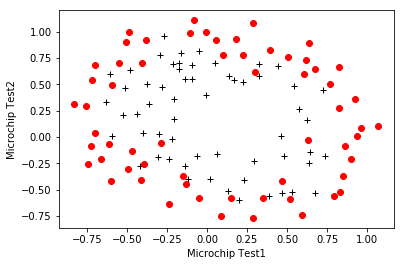

In [39]:
import numpy as np
import matplotlib.pyplot as plt
#test1 stores score of a student in exam1
#test2 stores score of a student in exam2
#result stores whether a student is admitted or not


test1 = []
test2 = []
result = []
result1 = []
result2 = []

#load data from the file
test1,test2,result = np.loadtxt("ex2data2.txt",unpack = True , delimiter = ",")
result = np.array(result).reshape(len(test1),1)
result1 = result
result2 = result

#plot data
for i in range(len(test1)):
    if result[i] == 0:
        plt.plot(test1[i],test2[i],'ro',color = "red")
    else:
        plt.plot(test1[i],test2[i],'k+',color = "black")

plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.show()

#m store number of trainig set
m = len(test1)

In [40]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures as sppf

df = pd.read_csv("ex2data2.txt",header = None)
df.columns = ['x1','x2','result']

#Matrix store features
Xt= np.matrix([df['x1'],df['x2']])
X = Xt.transpose()

#create a 28-dimensional matrix
def featureMapping(X):
    poly = sppf(6)
    return poly.fit_transform(X)

#new feature matrix stores high order polynomial terms
X_new = np.matrix(featureMapping(X))

theta = np.zeros(28).reshape(28,1)
print(X_new)



[[  1.00000000e+00   5.12670000e-02   6.99560000e-01 ...,   6.29470940e-04
    8.58939846e-03   1.17205992e-01]
 [  1.00000000e+00  -9.27420000e-02   6.84940000e-01 ...,   1.89305413e-03
   -1.39810280e-02   1.03255971e-01]
 [  1.00000000e+00  -2.13710000e-01   6.92250000e-01 ...,   1.04882142e-02
   -3.39734512e-02   1.10046893e-01]
 ..., 
 [  1.00000000e+00  -4.84450000e-01   9.99270000e-01 ...,   2.34007252e-01
   -4.82684337e-01   9.95627986e-01]
 [  1.00000000e+00  -6.33640000e-03   9.99270000e-01 ...,   4.00328554e-05
   -6.31330588e-03   9.95627986e-01]
 [  1.00000000e+00   6.32650000e-01  -3.06120000e-02 ...,   3.51474517e-07
   -1.70067777e-08   8.22905998e-10]]


In [42]:
#sigmoid function implementation
def sigmoid_function(z):
          return (1/(1 + np.exp(-z)))

#calculate cost for a given theta and fix training set
def Cost_function(theta,X,m,result,Lambda):
    theta = theta.reshape(28,1)
    temp  = result.T*(np.log(sigmoid_function(X*theta)))
    temp2 = np.dot((1-result).T,np.log(1 - sigmoid_function(np.dot(X,theta))))
    
    cost = temp + temp2
    cost = -(cost/m)
    
    #calculate regression term
    Reg_Term = (Lambda/(2*m)) * np.sum(np.dot(theta[1:].T,theta[1:]))
    
    
    #UPDATE COST
    cost = cost + Reg_Term
    return cost

#calculate gradient for a given theta and a fix training set
def Gradient(theta,X,m,result,Lambda):
    theta = theta.reshape(28,1)
    gradient = np.dot(X.T,(sigmoid_function(X*theta) - result))
    gradient = (gradient/m)
   
    
    #calculate regression term
    t = theta[0]
    Reg_Term = (Lambda/m) *theta
    theta[0] = t
    gradient = gradient + Reg_Term
    return (gradient[0],gradient[1],gradient[2],gradient[3],gradient[4])

#initializes lambda
Lambda = 1

print("Lamda is 1 and theta is 0\n")
print(Cost_function(theta,X_new,m,result,Lambda))
print(Gradient(theta,X_new,m,result,Lambda))


#test the model with lambda = 10 and theta = 1

Lambda_new = 10
theta_test = np.ones(28).reshape(28,1)

print("Lamda is 10 and theta is 1\n")
print(Cost_function(theta_test,X_new,m,result,Lambda_new))
print(Gradient(theta_test,X_new,m,result,Lambda_new))

Lamda is 1 and theta is 0

[[ 0.69314718]]
(matrix([[ 0.00847458]]), matrix([[ 0.01878809]]), matrix([[  7.77711864e-05]]), matrix([[ 0.05034464]]), matrix([[ 0.01150133]]))
Lamda is 10 and theta is 1

[[ 3.16450933]]
(matrix([[ 0.43079084]]), matrix([[ 0.16135192]]), matrix([[ 0.19479576]]), matrix([[ 0.22686278]]), matrix([[ 0.09218568]]))


In [17]:
#for optimization of cost function by optimizing parameters
from scipy import optimize
from scipy.optimize import minimize

Lamda_test_ZERO = 0

Lamda_test_100 = 100

theta_0 = np.zeros(28).reshape(28,1)

theta_100 = np.zeros(28).reshape(28,1)

#optimize the parameters using scipy.optimize.minimize and scipy.optimize.fmin
opt_ZERO = optimize.minimize(Cost_function, theta_0, args=(X_new,m,result,Lamda_test_ZERO),  method='BFGS', options={"maxiter":500, "disp":True} )

theta_0 = opt_ZERO.x
theta_0_value = opt_ZERO.fun

         Current function value: 0.238244
         Iterations: 500
         Function evaluations: 15300
         Gradient evaluations: 510


In [18]:
print(theta_0)
print(theta_0_value)
#print(theta_100_value)

[   26.9869608     41.93321957    34.94872151  -273.24781389  -133.32340582
  -127.62944813  -305.24370625  -391.288171    -255.56003422  -113.41088849
   928.3992476    901.731499    1194.97975298   511.22529163   231.8024763
   517.00285828   961.11466175  1144.70599034   826.96840813   342.12708691
   112.46275582 -1043.69131755 -1592.91935839 -2504.05576228 -1991.01233482
 -1591.16696711  -594.33628417  -174.4792035 ]
0.2382437582680834


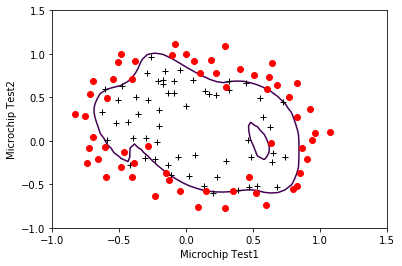

In [19]:
import matplotlib.pyplot as plt
#plot graph when lambda = 0

#plot data-set
for i in range(len(test1)):
    if result[i] == 0:
        plt.plot(test1[i],test2[i],'ro',color = "red")
    else:
        plt.plot(test1[i],test2[i],'k+',color = "black")

plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")

xlin = np.linspace(-1,1.5,50)
ylin = np.linspace(-1,1.5,50)
zlin = np.zeros((len(xlin),len(ylin)))

for i in range(len(xlin)):
    for j in range(len(ylin)):
        temp_matric = np.matrix([xlin[i],ylin[j]])
        zlin[i][j] = np.dot(theta_0,featureMapping(temp_matric).T)
zlin = zlin.T
u,v = np.meshgrid(xlin,ylin)
contou_plot = plt.contour(xlin,ylin,zlin,[0])
plt.show()

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48


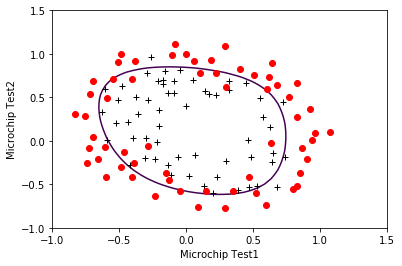

In [20]:
#for optimization of cost function by optimizing parameters
from scipy import optimize
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Lamda_test_ONE = 1
theta_1 = np.zeros(28).reshape(28,1)

opt_ONE = optimize.minimize(Cost_function, theta_1, args=(X_new,m,result1,Lamda_test_ONE),  method='BFGS', options={"maxiter":500, "disp":True} )

theta_1 = opt_ONE.x
theta_1_value = opt_ONE.fun

#plot graph when lambda = 1

#plot data-set
for i in range(len(test1)):
    if result[i] == 0:
        plt.plot(test1[i],test2[i],'ro',color = "red")
    else:
        plt.plot(test1[i],test2[i],'k+',color = "black")

plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")

xlin = np.linspace(-1,1.5,50)
ylin = np.linspace(-1,1.5,50)
zlin = np.zeros((len(xlin),len(ylin)))

for i in range(len(xlin)):
    for j in range(len(ylin)):
        temp_matric = np.matrix([xlin[i],ylin[j]])
        zlin[i][j] = np.dot(theta_1,featureMapping(temp_matric).T)
zlin = zlin.T
u,v = np.meshgrid(xlin,ylin)
contou_plot = plt.contour(xlin,ylin,zlin,[0])
plt.show()

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 660
         Gradient evaluations: 22


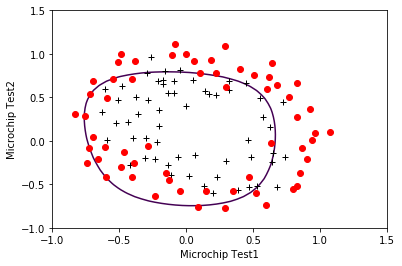

In [22]:
#for optimization of cost function by optimizing parameters
from scipy import optimize
from scipy.optimize import minimize

Lamda_test_10 = 10
theta_10 = np.zeros(28).reshape(28,1)

opt_10 = optimize.minimize(Cost_function, theta_10, args=(X_new,m,result1,Lamda_test_10),  method='BFGS', options={"maxiter":500, "disp":True} )


theta_10 = opt_10.x
theta_10_value = opt_10.fun

import matplotlib.pyplot as plt
#plot graph when lambda = 10

#plot data-set
for i in range(len(test1)):
    if result[i] == 0:
        plt.plot(test1[i],test2[i],'ro',color = "red")
    else:
        plt.plot(test1[i],test2[i],'k+',color = "black")

plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")

xlin = np.linspace(-1,1.5,50)
ylin = np.linspace(-1,1.5,50)
zlin = np.zeros((len(xlin),len(ylin)))

for i in range(len(xlin)):
    for j in range(len(ylin)):
        temp_matric = np.matrix([xlin[i],ylin[j]])
        zlin[i][j] = np.dot(theta_10,featureMapping(temp_matric).T)
zlin = zlin.T
u,v = np.meshgrid(xlin,ylin)
contou_plot = plt.contour(xlin,ylin,zlin,[0])
plt.show()

In [23]:
print(theta_10)
print(theta_10_value)
print(Cost_function(theta_10,X_new,m,result,10))

[ 0.32617629 -0.00818426  0.16576246 -0.44671257 -0.11184491 -0.27889563
 -0.0714147  -0.0579626  -0.06515766 -0.10636118 -0.3367736  -0.01298217
 -0.1167755  -0.02812656 -0.2860551  -0.11612312 -0.03708066 -0.02244028
 -0.04890226 -0.04166959 -0.18673751 -0.2533691  -0.00291247 -0.05800248
 -0.00053337 -0.06356787 -0.0120822  -0.27149265]
0.6482157032892324
[[ 0.6482157]]


Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 240
         Gradient evaluations: 8
[ 0.02188605 -0.01748167  0.00571028 -0.05516939 -0.01314887 -0.0385992
 -0.01846355 -0.00773235 -0.00892435 -0.02280491 -0.04343874 -0.00235624
 -0.01415631 -0.00349508 -0.04143634 -0.02100597 -0.00471922 -0.00359134
 -0.00632234 -0.00502444 -0.03197707 -0.03416353 -0.00107628 -0.00702623
 -0.00038507 -0.00798241 -0.00154777 -0.0410871 ]
0.6864838338807362


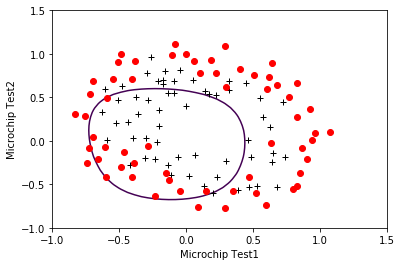

In [24]:
#for optimization of cost function by optimizing parameters
from scipy import optimize
from scipy.optimize import minimize

Lamda_test_100 = 100
theta_100 = np.zeros(28).reshape(28,1)

opt_100 = optimize.minimize(Cost_function, theta_100, args=(X_new,m,result1,Lamda_test_100),  method='BFGS', options={"maxiter":500, "disp":True} )


theta_100 = opt_100.x
theta_100_value = opt_100.fun

print(theta_100)
print(theta_100_value)
import matplotlib.pyplot as plt
#plot graph when lambda = 100

#plot data-set
for i in range(len(test1)):
    if result[i] == 0:
        plt.plot(test1[i],test2[i],'ro',color = "red")
    else:
        plt.plot(test1[i],test2[i],'k+',color = "black")

plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")

xlin = np.linspace(-1,1.5,50)
ylin = np.linspace(-1,1.5,50)
zlin = np.zeros((len(xlin),len(ylin)))

for i in range(len(xlin)):
    for j in range(len(ylin)):
        temp_matric = np.matrix([xlin[i],ylin[j]])
        zlin[i][j] = np.dot(theta_100,featureMapping(temp_matric).T)
zlin = zlin.T
u,v = np.meshgrid(xlin,ylin)
contou_plot = plt.contour(xlin,ylin,zlin,[0])
plt.show()

In [25]:
print(theta_100)
print(theta_100_value)

[ 0.02188605 -0.01748167  0.00571028 -0.05516939 -0.01314887 -0.0385992
 -0.01846355 -0.00773235 -0.00892435 -0.02280491 -0.04343874 -0.00235624
 -0.01415631 -0.00349508 -0.04143634 -0.02100597 -0.00471922 -0.00359134
 -0.00632234 -0.00502444 -0.03197707 -0.03416353 -0.00107628 -0.00702623
 -0.00038507 -0.00798241 -0.00154777 -0.0410871 ]
0.6864838338807362
